# Pollution visualization 


We are working with the city of Houston to look at the relationship between sulfur dioxide (SO2) and nitrogen dioxide (NO2) pollution, specifically, pollution in the most recent year data was collected (2014). You have singled out a particularly bad day, November 26th, where there was a bad spike in the SO2 levels. To draw the viewers attention to this bad day, you will highlight it in a bright orangish-red and color the rest of the points gray.

### Import libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
pollution = pd.read_csv('Pollution dataset.csv')

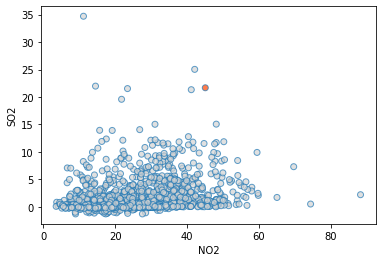

In [8]:
houston_pollution = pollution[pollution.city  ==  'Houston']

# Make array orangred for day 330 of year 2014, otherwise lightgray
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray' 
                  for day,year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2',
            y = 'SO2',
            data = houston_pollution,
            fit_reg = False, 
            # Send scatterplot argument to color points 
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

- Now we want to look at the behavior of both NO2 and SO2 when the un-plotted ozone (O3) value was at its highest in cities in Huston.

To do this, replace the logic in the current list comprehension with one that compares a row's O3 value with the highest observed O3 in the dataset. 

Note: use sns.scatterplot() instead of sns.regplot(). This is because sns.scatterplot() can take a non-color vector as its hue argument and colors the points automatically while providing a helpful legend.

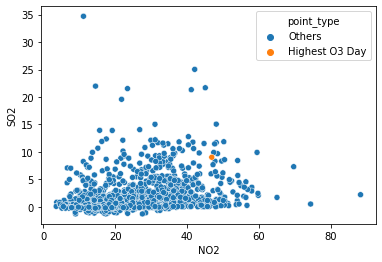

In [9]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()

# Find the highest observed O3 value
max_O3 = houston_pollution.O3.max()

# Make a column that denotes which day had highest O3
houston_pollution['point_type'] = ['Highest O3 Day' if  O3 ==  max_O3 else 'Others' for O3 in houston_pollution.O3]

# Encode the hue of the points with the O3 generated column
sns.scatterplot(x = 'NO2',
                y = 'SO2',
                hue = 'point_type',
                data = houston_pollution)
plt.show()

### Comparing with two KDEs

Imagine that we work for the premier air-filter provider. Our company has asked you to build a report that looks into why 2012 was a particularly good year for sales of your ozone (O3) filter. We downloaded some helpful pollution data from the USGS, and we want to make a concise visualization that compares the general pattern of O3 pollution for 2012 to all other years on record.

To do this, we can build two overlaid kernel density estimation plots (KDEs): one for 2012 O3 data and one for all other years.

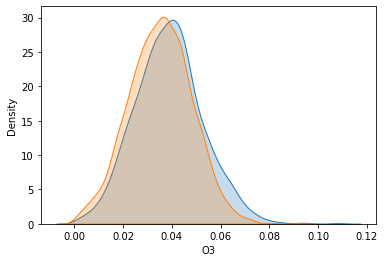

In [10]:
# Filter dataset to the year 2012
sns.kdeplot(pollution[pollution.year == 2012].O3, 
            # Shade under kde and add a helpful label
            shade = True,
            label = '2012')

# Filter dataset to everything except the year 2012
sns.kdeplot(pollution[pollution.year != 2012].O3, 
            # Again, shade under kde and add a helpful label
            shade = True,
            label = 'other years')
plt.show()

From this plot, we can see that 2012 had slightly higher than typical O3 levels, which may explain the filter sales. However, keen observers will note that some of our cities don't have full data for 2012, which could skew the trends. Next up we will look at techniques that can help out KDE's be more honest about this lack of data.

### Improving  KDEs

One way of enhancing KDEs is with the addition of a rug plot. Rug plots are little dashes drawn beneath the density that show precisely where each data point falls. Adding a rug plot is particularly useful when we don't have a ton of data.

With small amounts of data we often have gaps along your support with no data, and it can be hard to tell whether a non-zero KDE line means data was present or is due to a wide kernel. A rug plot helps address this.

Let's return to the sns.distplot() function to draw two KDEs: one looking at the data for Vandenberg Air Force Base and the other looking at all the other cities in the pollution data. Since there is much less data contributing to the shape of the Vandenberg plot, add a rug plot beneath it.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level funct

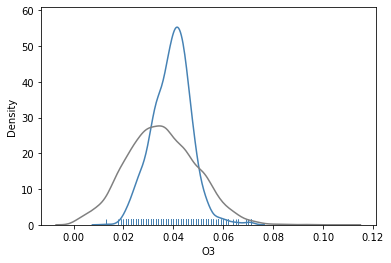

In [11]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', 
             # Turn off the histogram and color blue to stand out
             hist = False,
             color = 'steelblue', 
             # Turn on rugplot
             rug = True)

sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities',
             # Turn off histogram and color gray
             hist = False,  
             color = 'gray')
plt.show()

Rug plots can improve KDEs as they help us see those gaps that we may have otherwise assumed were filled with data. In this plot, the rug plot shows that there is a small, but _not neglible_ gap, in the data around O3 = 0.065.

### Beeswarms

Build a beeswarm plot using _sns.swarmplot()_ that looks at the Ozone levels for all the cities in the pollution data for the month of March. To make the beeswarm a bit more legible, decrease the point size to avoid the overcrowding caused by the many points drawn on the screen. Last, since we've done some manipulation of the data to make this plot, provide a title to help the reader orient with what they are viewing.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


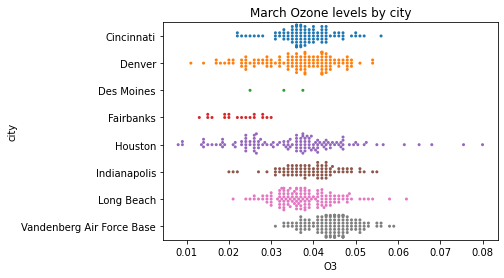

In [12]:
# Filter data to just March
pollution_mar = pollution[pollution.month == 3]

# Plot beeswarm with x as O3
sns.swarmplot(y = "city",
              x = 'O3', 
              data = pollution_mar, 
              # Decrease the size of the points to avoid crowding 
              size = 3)

# Give a descriptive title
plt.title('March Ozone levels by city')
plt.show()

Beeswarms are a nice (and nice looking) way of comparing a bunch of classes to each other. In the plot, we can see that Vandenberg on average has high O3 levels in March. However, Houston has a much wider range and can sometimes reach much higher levels. 

Additionally, we can also get a sense of data quantities. Here, we see that Des Moines and Fairbanks have far fewer observations than the other sites.

### A basic text annotation

On the current scatter plot, we can see a particularly prominent point that contains the largest SO2 value observed for August. This point is Cincinnati on August 11th, 2013; however, we would not be able to learn this information from the plot in its current form. Basic text annotations are great for pointing out interesting outliers and giving a bit more information. Draw the readers attention to this Cincinnati value by adding a basic text annotation that gives a bit of the background about this outlier.

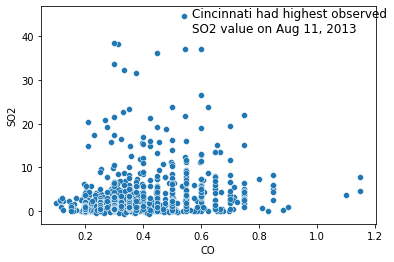

In [14]:
# Draw basic scatter plot of pollution data for August
sns.scatterplot(x = 'CO', y = 'SO2', data = pollution[pollution.month  ==  8])

# Label highest SO2 value with text annotation
plt.text(0.57, 41,
         'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         # Set the font to large
         fontdict = {'ha': 'left', 'size': 'large'})
plt.show()

It's amazing how something as simple as adding a bit of text on a plot can take it from something the reader mindlessly scans to a learning experience. Here we have managed to convey the large-scale relationship of the two pollutants while also giving the viewer a glimpse into an outlier.

### Arrow annotations

Imagine we are a city planner for Long Beach, California. Long Beach is located on the Pacific Ocean and has a large firework show every New Year's Eve. We want to look into whether this show negatively impacts the air quality of the city. To do this, we will look at CO and NO2 levels on New Year's Day. However, it turns out that New Year's Day is not one of the outliers in the plot on the right, it's located in one of the more crowded areas.

To help guide the reader to this point, we'll use an annotation along with an arrow that points to the New Year's Day value. This will provide a nice annotation that explains what the viewer is looking while printing the text in a less crowded region of the plot.

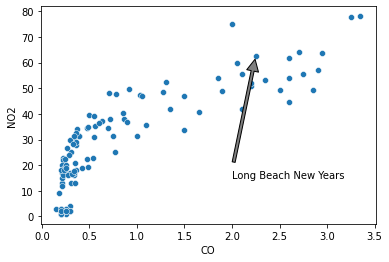

In [17]:
# Query and filter to New Years in Long Beach
jan_pollution = pollution.query("(month  ==  1) & (year  ==  2012)")
lb_newyears = jan_pollution.query("(city  ==  'Long Beach')&(day  ==  1)")

sns.scatterplot(x = 'CO', y = 'NO2',
                data = jan_pollution)

# Point arrow to lb_newyears & place text in lower left 
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'white')
plt.show()

Using arrows with annotations is a great way to keep your text in a nice point-free area of the plot while precisely calling out a given point in a more-crowded location. In this plot, there is what appears to be a slightly higher than normal quantity of NO2 in the air compared to usual. The viewer's attention is driven to the point of interest at first rather than the more obvious outliers, thus kicking off their exploration of the chart in a guided way.

### Combining annotations and color

We believe that Long Beach, California has a smog problem. Using the pollution data, you'll attempt to make a point for increasing smog reduction regulations using your data visualization wizardry. Specifically, you want to focus on the relationship of CO to O3 levels during 2014 at a city council meeting.

To emphasize how Long Beach compares to a set of peer cities, we've decided to highlight Long Beach and draw attention to a particularly bad day where the CO level was 1.6 and O3 was 0.072 using an annotation.

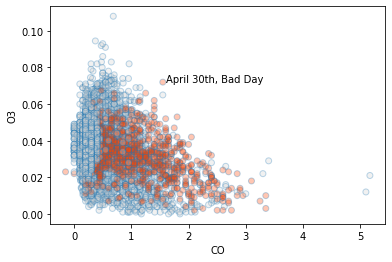

In [16]:
# Make a vector where Long Beach is orangered; else lightgray
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

# Map facecolors to the list is_lb and set alpha to 0.3
sns.regplot(x = 'CO',
            y = 'O3',
            data = pollution,
            fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})

# Add annotation to plot
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

List comprehensions are a great tool for quickly controlling colors or other aspects for a plot. It's often easier and cleaner to directly pass a vector of the desired aesthetics to your plot rather than adding a new column to your DataFrame (for instance in this example a column containing True or False for if a city is Long Beach) and then telling your plot how to map that column to aesthetics.
In this course, you'll continue exploring techniques to make your data visualizations more efficient, attractive, and impactful. 


### Getting rid of unnecessary color

You might want to compare the relationship CO to NO2 values across cities using a simple scatter plot with color to differentiate the different cities' data.




/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CO', ylabel='NO2'>

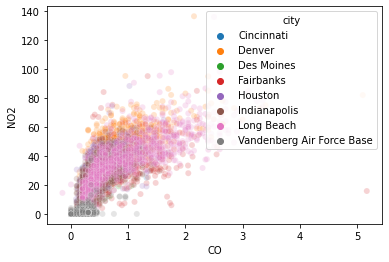

In [18]:
# Hard to read scatter of CO and NO2 w/ color mapped to city
sns.scatterplot('CO', 'NO2',
                 alpha = 0.2,
                 hue = 'city',
                 data = pollution)

Unfortunately, the resulting plot is very convoluted. It's hard to make out differences between the cities because one has to differentiate between similar colors. It turns out that sometimes the best color palette for your plot is no color at all.

To remedy this hard-to-read chart, get rid of the color component and facet by each city. While the resulting plot may not be as pretty, it will be a much better tool to decipher the differences.

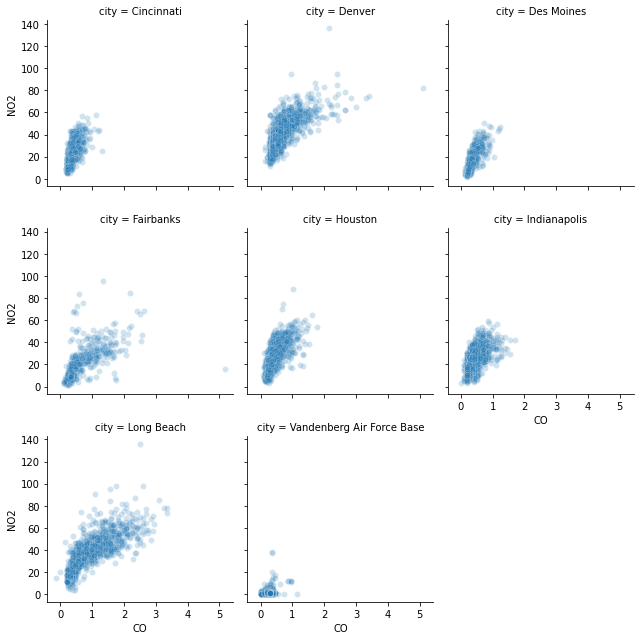

In [19]:
# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

This new faceted plot removes the pretty colors but becomes a whole lot more informative. In certain situations, if you can take something that is encoded in color and encode it in position instead, you often will increase the legibility of your chart. The balance between attractiveness and utility is something you need to balance in every plot you make.

### Fixing Seaborn's bar charts

Seaborn's default values for the colors of bars in a bar chart are not ideal for the most accurate perception. By drawing each bar as a different color, there is a risk of the viewer seeing two identical sized bars as different sizes as people tend to see some colors as 'larger' than others.


We discussed two easy ways to fix this. First, to put a border around the bars; second, change all bar colors to the same value. Try both of these solutions on our pollution data.

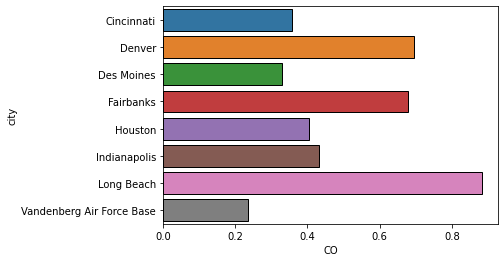

In [21]:
sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            ci = False,
            data = pollution,
            # Add a border to the bars
            edgecolor = 'black')
plt.show()

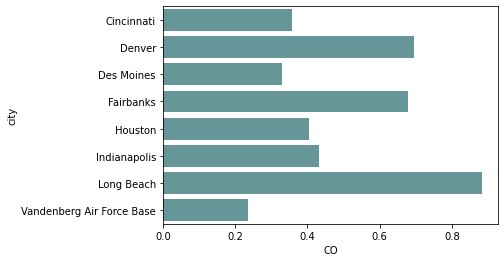

In [22]:
sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            ci = False,
            data = pollution,
            # Replace border with bar colors
            color = 'cadetblue')
plt.show()

Adding borders is an easy and quick way to improve default bar charts without sacrificing some of the trippy colors. Spending a tiny bit more time to adjust the default colors will result in a more accurate and easy to read chart.

### Making a custom continuous palette

We are interested in the pollution levels of Cincinnati for the year 2014. Specifically, we're interested in CO and NO2, so we make a simple scatter plot to show the relationship between the two pollutants.


However, there may be some interesting information in how the value of O3 relates to the two plotted pollutants, so we decide to color the points by their O3 levels. To do this, we need to define an appropriate continuous palette and map our O3 column to it in our scatter plot.

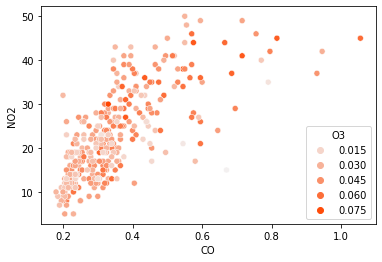

In [23]:
# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)
plt.show()

### Using a custom categorical palette

When we have a line chart with lots of categories choosing our palette carefully is essential. Often default palettes have very similar hues, that are hard to differentiate when spread over the small surface of a line. ColorBrewer palettes are built with this in mind and keep the colors as distinct as possible.

In this section, we will make a line plot of the O3 values over the year of 2013 for all the cities where the color of each line is encoded by city. We will use the ColorBrewer palette 'Set2' to improve upon the default color scheme.

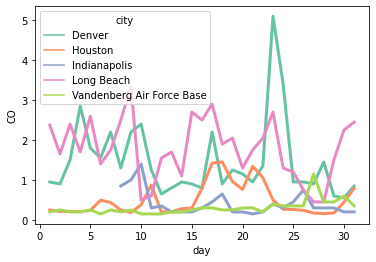

In [34]:
# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             hue = "city",
             palette = "Set2", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()

By carefully choosing our categorical palettes we can increase the speed and accuracy with which our visualization is read. Here, thanks to the well-separated colors, it is easy to determine that the large spike around 23 days belongs to Denver.

### Coloring ordinal categories

We are working for the Des Moines city council to assess the associations of various pollutant levels in the city. The two most important pollutants are SO2 and NO2 but CO is also of interest. We've only been allowed enough space for a single plot for our part of the report.

We start with a scatter plot of the SO2 and NO2 values as we are most important and then decide to show the CO values using a color scale corresponding to CO quartiles. By binning the continuous CO values, we have turned CO into an ordinal variable that can illuminate broad patterns without requiring much effort from the viewer to compare subtly different shades.

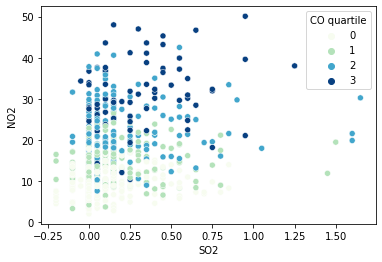

In [37]:
# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()

By simplifying the color encoding to just four distinct values, you get a clear picture of the patterns between CO, SO2, and NO2. Here you see the low quartiles of CO seem to relate with NO2 and appear much less related to the SO2 values. By categorizing the continuous color variable, you allow the viewer to investigate patterns along a third variable in a clear and simple way at the expense of some precision: a tradeoff that is often worth it.